In [1]:
include("truss.jl")
using CairoMakie

In [12]:
nodes = Float64[
    0.0 0.0;
    1.0 0.0;
    2.0 0.0;
    3.0 0.0;
    1.0 1.0;
    2.0 1.0;
    3.0 1.0;
]

connectivity = Int64[
    1 2;
    1 5;
    2 3;
    2 5;
    2 6;
    3 4;
    3 6;
    3 7;
    4 7;
    5 6;
    6 7;
]

# Circular cross section.
D = 0.02     # Diameter (m)
A = π*D^2/4  # Area (m²)

# Young's modulus (Pa).
E = 205e9  # Steel

truss = Truss(nodes, connectivity, A, E);

In [23]:
# Boundary conditions.
fixed_nodes = [1, 4]
forces = Dict(2 => [0.0, -500.0], 3 => [0.0, -1000.0]);

d, f, σ = solve(truss, fixed_nodes, forces)

T = σ * A;

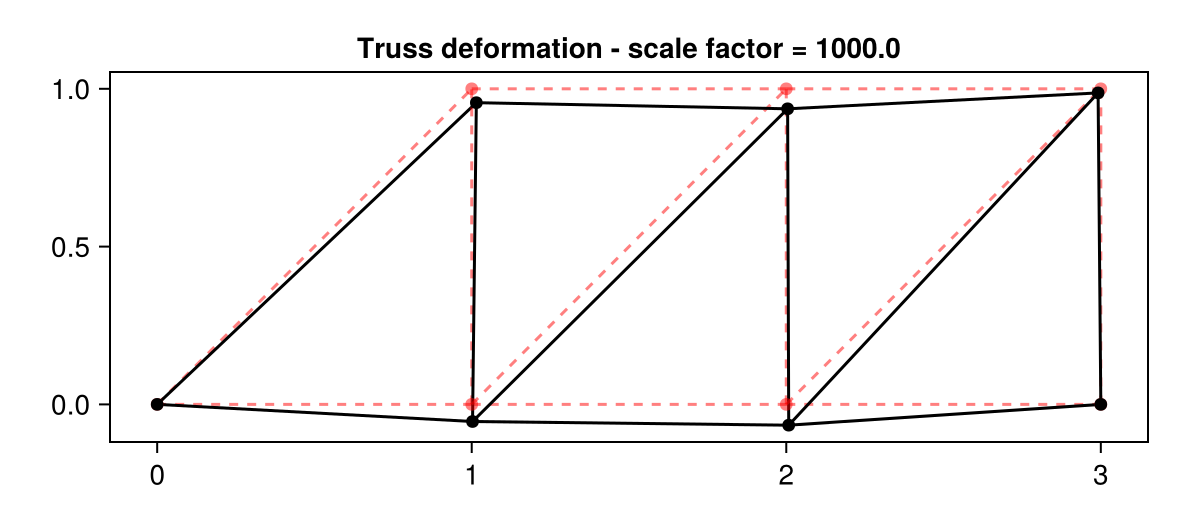

In [32]:
# Plot truss deformation.
scale_factor = 1e3

nel = truss.number_of_elements
nodes1 = truss.nodes
nodes2 = truss.nodes .+ scale_factor*d
con = truss.connectivity

figw = 600
Δx = maximum(nodes1[:, 1]) - minimum(nodes1[:, 1])
Δy = maximum(nodes1[:, 2]) - minimum(nodes1[:, 2])
figh = figw * Δy/Δx * 1.3

f1 = Figure(size=(figw, figh))

ax1 = Axis(
    f1[1, 1],
    aspect=DataAspect(),
    xgridvisible=false,
    ygridvisible=false,
    title="Truss deformation - scale factor = $scale_factor"
)

for i in 1:nel
    lines!(ax1, nodes1[con[i, :], 1], nodes1[con[i, :], 2], color=(:red, 0.5), linestyle=:dash)
    lines!(ax1, nodes2[con[i, :], 1], nodes2[con[i, :], 2], color=(:black, 1.0), linestyle=:solid)
end

scatter!(ax1, nodes1[:, 1], nodes1[:, 2], color=(:red, 0.5), label="undeformed")
scatter!(ax1, nodes2[:, 1], nodes2[:, 2], color=(:black, 1.0), label="deformed")

save("truss_deformation.svg", f1)
f1

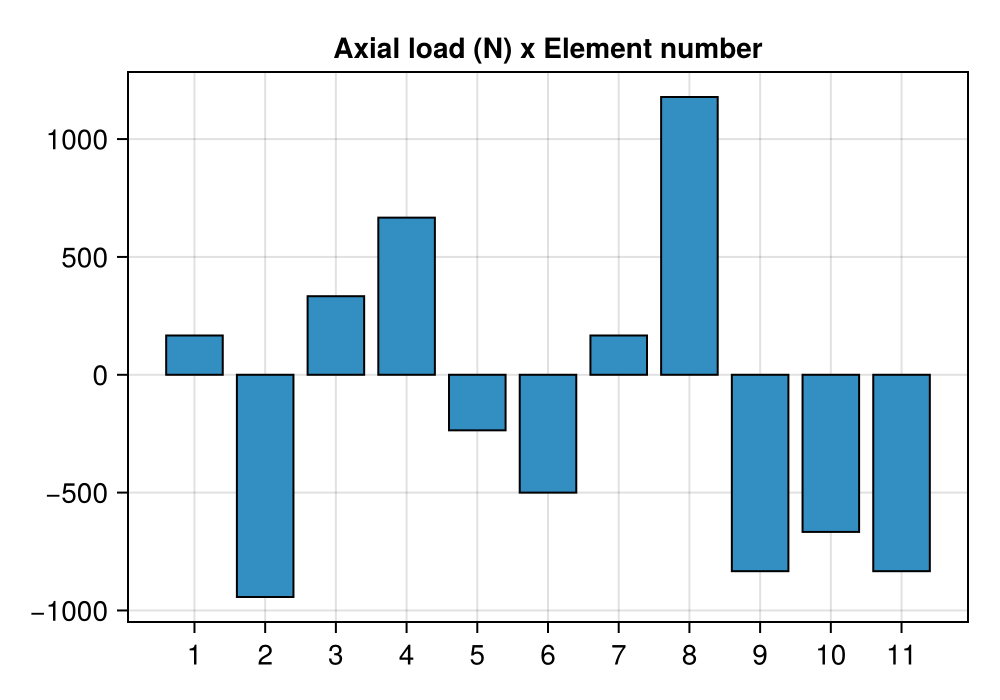

In [31]:
f2 = Figure(size=(500, 350))

ax2 = Axis(
    f2[1,1],
    xtickformat="{:d}",
    xticks=1:truss.number_of_elements,
    title="Axial load (N) x Element number",
)

barplot!(ax2, 1:truss.number_of_elements, T, strokecolor=:black, strokewidth=1)

save("axial_load.svg", f2)
f2